<a href="https://colab.research.google.com/github/tusharbansal22/Tensorflow-Notebooks/blob/main/Fashion_mnist_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model

In [12]:
fashion_mnist= tf.keras.datasets.fashion_mnist

(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
print(x_train.shape)


(60000, 28, 28)


In [13]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [14]:
K=len(set(y_train))
print('number of classes',K)

number of classes 10


In [15]:
i= Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x)

model=Model(i,x)

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5124 - accuracy: 0.8096 - val_loss: 0.3994 - val_accuracy: 0.8516
Epoch 2/15
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3522 - accuracy: 0.8672 - val_loss: 0.3339 - val_accuracy: 0.8763
Epoch 3/15
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3048 - accuracy: 0.8857 - val_loss: 0.3255 - val_accuracy: 0.8804
Epoch 4/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2726 - accuracy: 0.8970 - val_loss: 0.3163 - val_accuracy: 0.8842
Epoch 5/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2495 - accuracy: 0.9041 - val_loss: 0.3124 - val_accuracy: 0.8914
Epoch 6/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2272 - accuracy: 0.9143 - val_loss: 0.2945 - val_accuracy: 0.8998
Epoch 7/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2105 - accuracy: 0.9202 - val_loss: 0.3005 -

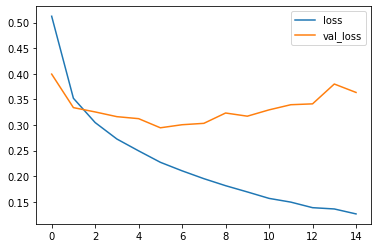

In [17]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

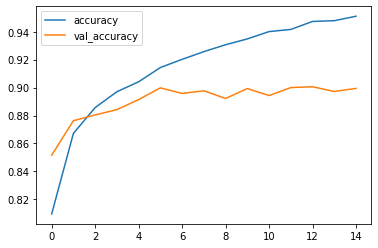

In [18]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

313/313 [==============================] - 2s 6ms/step
Confusion matrix, without normalization
[[869   2  29  19   4   1  73   0   3   0]
 [  2 980   1   9   1   0   3   0   4   0]
 [ 11   0 877  13  52   0  46   0   1   0]
 [ 16  11  22 904  29   1  15   0   2   0]
 [  0   1  82  27 835   0  54   0   1   0]
 [  0   0   0   1   0 973   0  19   0   7]
 [127   2  82  28  86   1 662   0  12   0]
 [  0   0   0   0   0   7   0 975   0  18]
 [  3   1   5   1   3   3   8   3 973   0]
 [  0   0   0   0   0   4   1  48   1 946]]


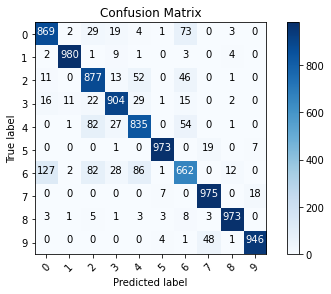

In [19]:

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt= '.2f' if normalize else 'd'
  thresh= cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white'if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [20]:
labels='''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle Boot
'''.split()

Text(0.5, 1.0, 'True label: Dress  Predicted label: Coat')

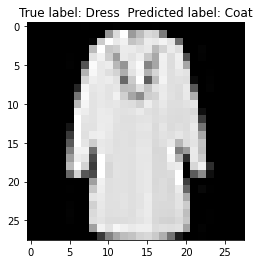

In [25]:
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title('True label: %s  Predicted label: %s'%(labels[y_test[i]],labels[p_test[i]]))